📄 Enter path to CSV file (format: a,b,w):  minflow.csv


✅ Read 5 edges from minflow.csv


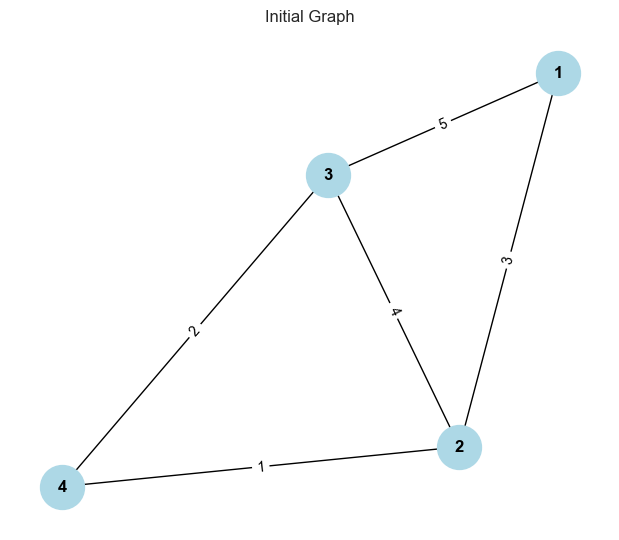

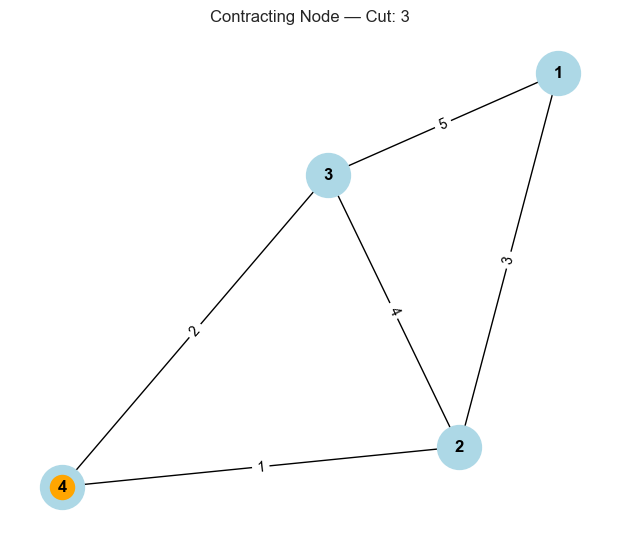

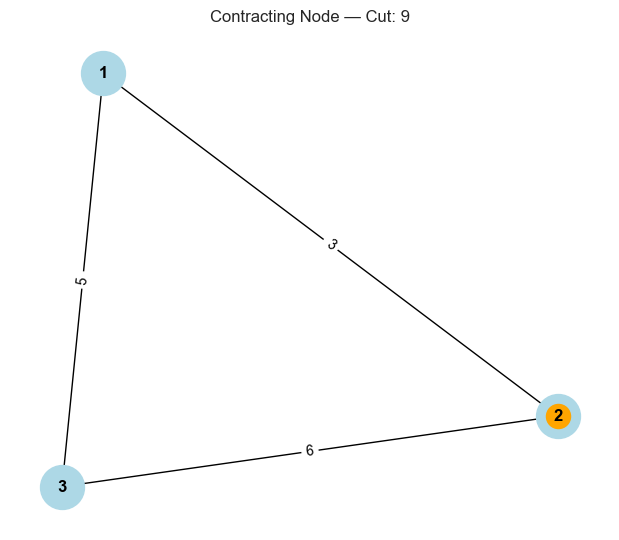

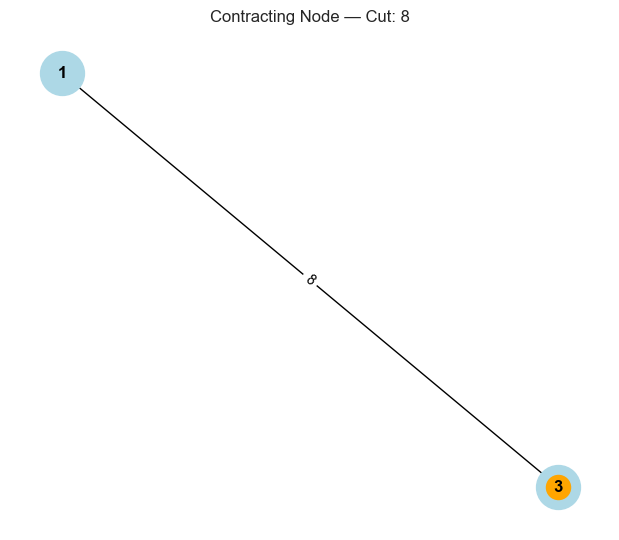

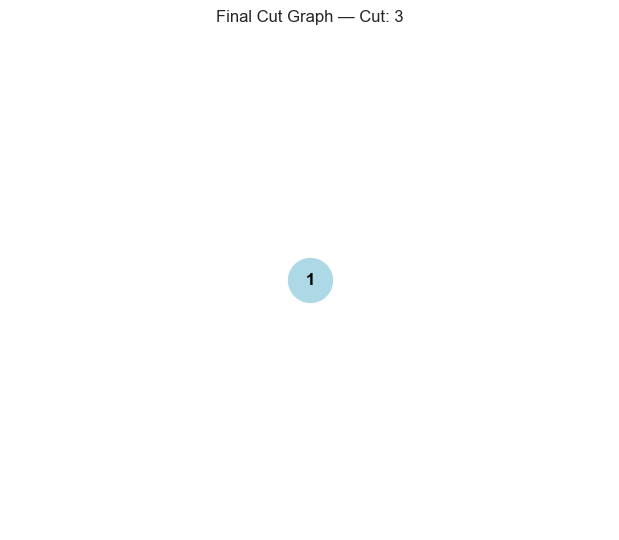


✅ Minimum Cut: 3


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import time

plt.style.use("seaborn-v0_8-dark")
INF = float('inf')

def visualize_graph(G, cut_value=None, contracted=None, pause_time=2, title="Graph"):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(6, 5))

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if contracted:
        nx.draw_networkx_nodes(G, pos, nodelist=contracted, node_color='orange')

    plt.title(f"{title} — Cut: {cut_value}" if cut_value is not None else title)
    plt.axis("off")
    plt.show()
    time.sleep(pause_time)

def stoer_wagner_visual(n, edges):
    G = nx.Graph()
    for i in range(1, n + 1):
        G.add_node(i)
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    min_cut = INF
    nodes = list(G.nodes)
    visualize_graph(G, title="Initial Graph")

    for _ in range(n - 1):
        used = {v: False for v in nodes}
        weights = {v: 0 for v in nodes}
        prev = nodes[0]
        last = None

        for _ in range(len(nodes)):
            sel = max((v for v in nodes if not used[v]), key=lambda x: weights[x], default=None)
            if sel is None:
                break
            used[sel] = True
            if _ == len(nodes) - 1:
                cut_value = weights[sel]
                if cut_value < min_cut:
                    min_cut = cut_value
                visualize_graph(G, cut_value, [sel], title="Contracting Node")
                for v in list(G.neighbors(sel)):
                    if v != prev:
                        if G.has_edge(prev, v):
                            G[prev][v]['weight'] += G[sel][v]['weight']
                        else:
                            G.add_edge(prev, v, weight=G[sel][v]['weight'])
                G.remove_node(sel)
                nodes.remove(sel)
                break
            last = prev
            prev = sel
            for v in G.neighbors(sel):
                if not used[v]:
                    weights[v] += G[sel][v]['weight']

    visualize_graph(G, cut_value=min_cut, title="Final Cut Graph")
    print("\n✅ Minimum Cut:", min_cut)
    return min_cut

def get_edges_from_csv(filepath):
    edges = []
    node_set = set()
    with open(filepath, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if len(row) != 3:
                print(f"⚠️ Skipping invalid row: {row}")
                continue
            a, b, w = map(int, row)
            edges.append((a, b, w))
            node_set.update([a, b])
    n = max(node_set)
    return n, edges

# Instead of GUI file picker, use CLI input
filepath = input("📄 Enter path to CSV file (format: a,b,w): ")
try:
    n, edges = get_edges_from_csv(filepath)
    print(f"✅ Read {len(edges)} edges from {filepath}")
    stoer_wagner_visual(n, edges)
except Exception as e:
    print("❌ Error:", e)